# Task 2: Data Understanding - Expedia Hotel Recommendations

This notebook performs exploratory data analysis (EDA) on the Expedia hotel dataset to understand patterns and relationships that could be useful for creating personalized hotel recommendations.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting styles
sns.set_style("whitegrid")
sns.set_palette('viridis')

## Loading the Dataset

The dataset is quite large, so we'll sample a portion for initial exploration.

In [4]:
# Load the dataset (sample for faster exploration)
print("Loading dataset...")
# For initial exploration, we'll use a subset
df_sample = pd.read_csv("../data/test_set_VU_DM.csv", nrows=100000)
print(f"Loaded {len(df_sample):,} rows with {len(df_sample.columns)} columns")

# Display first few rows
df_sample.head()

Loading dataset...
Loaded 100,000 rows with 50 columns


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.50,1,2.94,0.07,5.03,119.00,0,19222,1,10,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.50,1,2.64,0.08,4.93,118.00,0,19222,1,10,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.50,1,2.71,0.06,4.16,49.00,0,19222,1,10,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.50,1,2.40,0.06,5.03,143.00,0,19222,1,10,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.50,1,2.94,0.21,4.72,79.00,0,19222,1,10,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Dataset Information

Let's examine the basic structure of the dataset including column types and missing values.

In [5]:
# Dataset dimensions
print(f"Dataset shape: {df_sample.shape}")

# Check column data types
print("\nColumn data types:")
df_sample.dtypes

Dataset shape: (100000, 50)

Column data types:


srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance      float64
random_bool              

In [6]:
# Analyze missing values
missing_data = pd.DataFrame({
    'Missing Values': df_sample.isnull().sum(),
    'Percentage': (df_sample.isnull().sum() / len(df_sample) * 100).round(2)
})

missing_data = missing_data.sort_values('Percentage', ascending=False)
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
comp1_rate_percent_diff,98321,98.32
comp6_rate_percent_diff,98011,98.01
comp1_rate,97822,97.82
comp1_inv,97649,97.65
comp4_rate_percent_diff,97296,97.30
comp7_rate_percent_diff,97003,97.00
comp6_rate,95201,95.20
comp6_inv,94812,94.81
visitor_hist_starrating,94477,94.48
visitor_hist_adr_usd,94442,94.44


In [7]:
# Basic statistics for numeric columns
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
srch_id,100000.00,3272.88,1900.71,1.00,1636.00,3261.00,4914.50,6611.00
site_id,100000.00,10.19,7.88,1.00,5.00,5.00,14.00,34.00
visitor_location_country_id,100000.00,174.64,66.38,3.00,100.00,219.00,219.00,229.00
visitor_hist_starrating,5523.00,3.36,0.70,1.90,2.92,3.33,3.90,5.00
visitor_hist_adr_usd,5558.00,183.15,111.30,35.74,108.93,148.63,223.52,772.75
prop_country_id,100000.00,172.86,68.61,1.00,100.00,219.00,219.00,230.00
prop_id,100000.00,70052.24,40560.61,7.00,35021.00,69541.00,104957.00,140820.00
prop_starrating,100000.00,3.19,1.05,0.00,3.00,3.00,4.00,5.00
prop_review_score,99845.00,3.78,1.03,0.00,3.50,4.00,4.50,5.00
prop_brand_bool,100000.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00


## Understanding Feature Groups

Let's organize the dataset columns into meaningful groups for analysis.

In [8]:
# Organize columns into feature groups
search_features = ['srch_id', 'date_time', 'site_id', 'srch_destination_id',
                  'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
                  'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool']

user_features = ['visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd']

property_features = ['prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
                    'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
                    'orig_destination_distance']

price_features = ['prop_log_historical_price', 'price_usd', 'promotion_flag']

competitor_features = [col for col in df_sample.columns if col.startswith('comp')]

other_features = ['srch_query_affinity_score', 'random_bool']

print(f"Search features: {len(search_features)}")
print(f"User features: {len(user_features)}")
print(f"Property features: {len(property_features)}")
print(f"Price features: {len(price_features)}")
print(f"Competitor features: {len(competitor_features)}")
print(f"Other features: {len(other_features)}")

Search features: 10
User features: 3
Property features: 8
Price features: 3
Competitor features: 24
Other features: 2


## Search Feature Analysis

Analyze the search-related features to understand user search patterns.

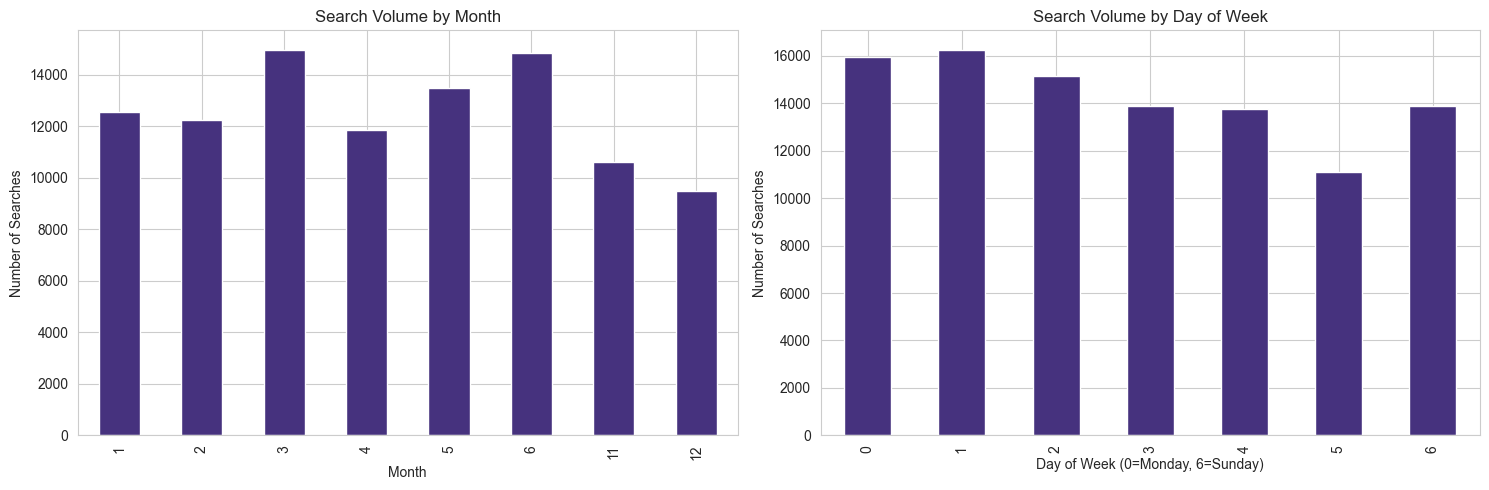

In [9]:
# Convert date_time to datetime
df_sample['date_time'] = pd.to_datetime(df_sample['date_time'])

# Extract time components
df_sample['year'] = df_sample['date_time'].dt.year
df_sample['month'] = df_sample['date_time'].dt.month
df_sample['day'] = df_sample['date_time'].dt.day
df_sample['dayofweek'] = df_sample['date_time'].dt.dayofweek  # 0=Monday, 6=Sunday

# Analyze search patterns by time
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
monthly_searches = df_sample.groupby('month').size()
monthly_searches.plot(kind='bar')
plt.title('Search Volume by Month')
plt.xlabel('Month')
plt.ylabel('Number of Searches')

plt.subplot(1, 2, 2)
daily_searches = df_sample.groupby('dayofweek').size()
daily_searches.plot(kind='bar')
plt.title('Search Volume by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Searches')

plt.tight_layout()

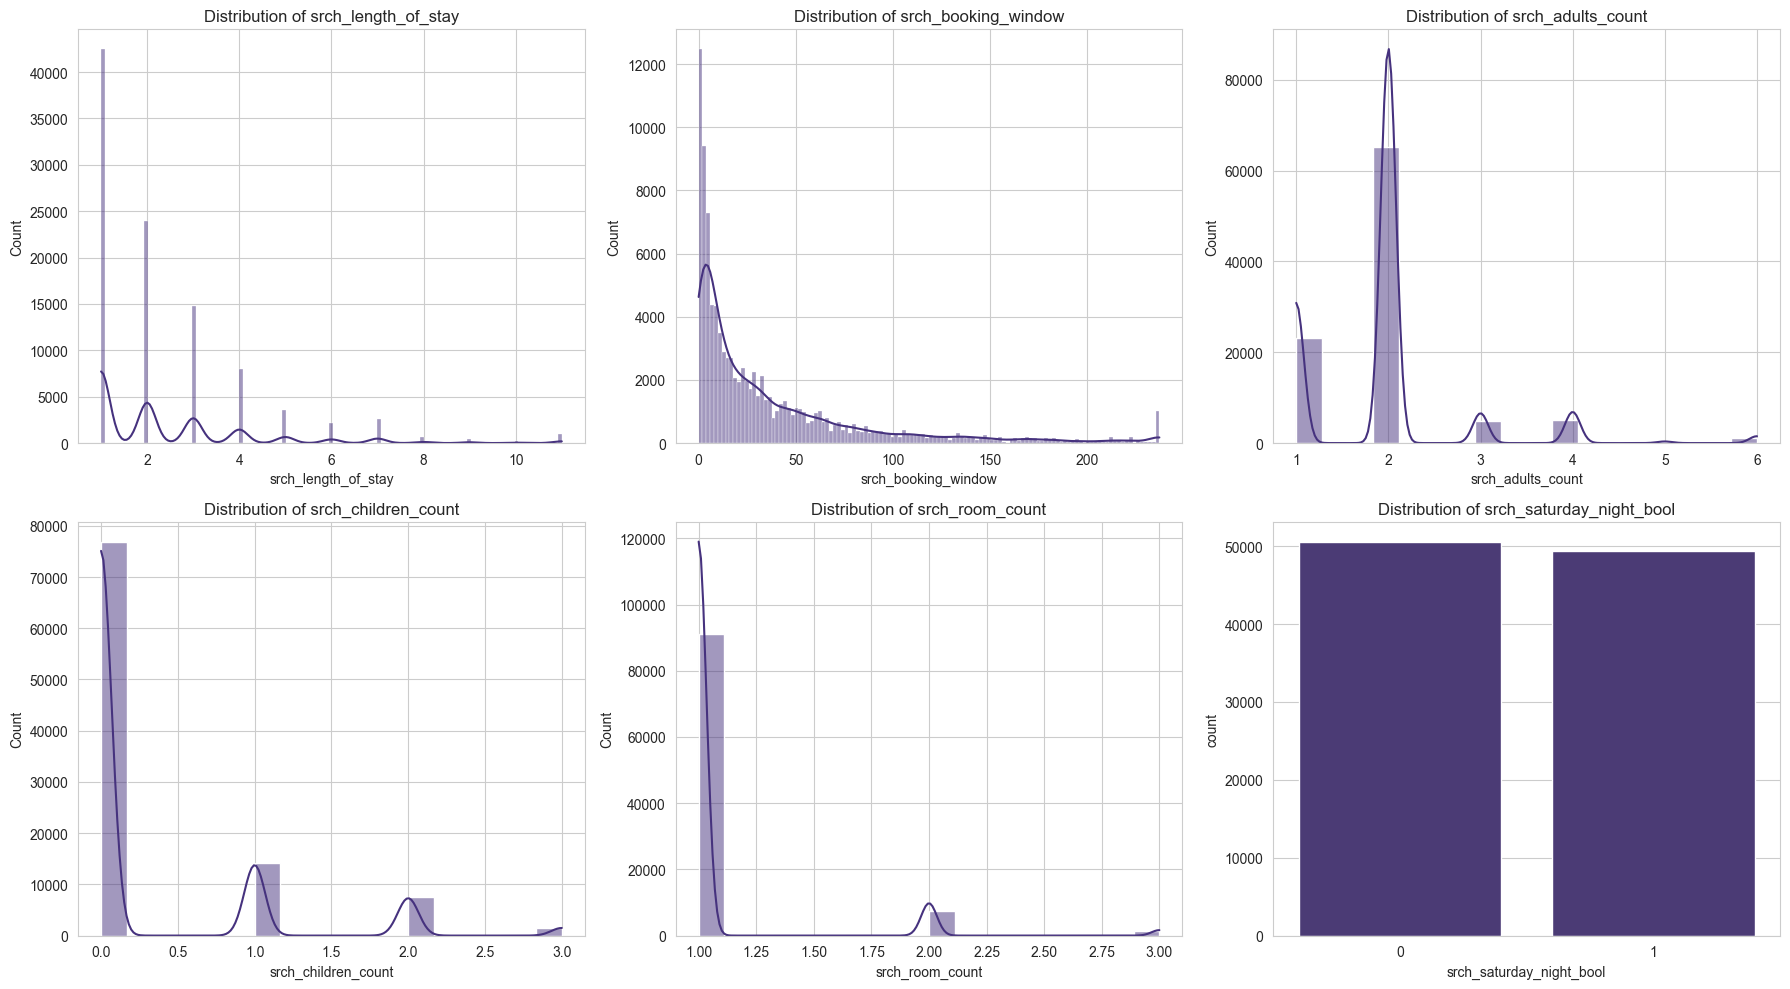

In [10]:
# Analyze search characteristics
search_chars = ['srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
               'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(search_chars):
    if col == 'srch_saturday_night_bool':
        sns.countplot(x=col, data=df_sample, ax=axes[i])
    else:
        # Clip extreme values for better visualization
        clip_value = df_sample[col].quantile(0.99)
        sns.histplot(df_sample[col].clip(upper=clip_value), kde=True, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()

In [11]:
# Analyze search IDs and destinations
print(f"Number of unique search IDs: {df_sample['srch_id'].nunique():,}")
print(f"Number of unique destinations: {df_sample['srch_destination_id'].nunique():,}")

# How many hotels are shown per search?
results_per_search = df_sample.groupby('srch_id').size()
print(f"Average number of hotels per search: {results_per_search.mean():.2f}")
print(f"Median number of hotels per search: {results_per_search.median():.0f}")
print(f"Min number of hotels per search: {results_per_search.min():.0f}")
print(f"Max number of hotels per search: {results_per_search.max():.0f}")

Number of unique search IDs: 4,012
Number of unique destinations: 2,088
Average number of hotels per search: 24.93
Median number of hotels per search: 30
Min number of hotels per search: 5
Max number of hotels per search: 36


## User Feature Analysis

Explore the user-related features to understand user characteristics and preferences.

Number of unique visitor countries: 93


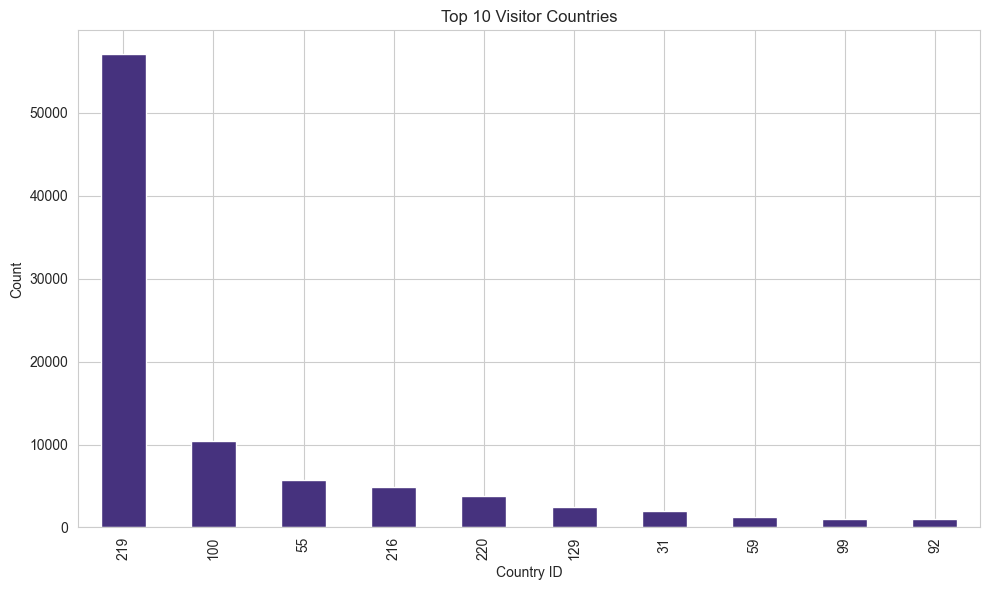

In [12]:
# Analyze user location countries
print(f"Number of unique visitor countries: {df_sample['visitor_location_country_id'].nunique():,}")
top_countries = df_sample['visitor_location_country_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Visitor Countries')
plt.xlabel('Country ID')
plt.ylabel('Count')
plt.tight_layout()

In [13]:
# Analyze user historical preferences
user_hist_cols = ['visitor_hist_starrating', 'visitor_hist_adr_usd']

for col in user_hist_cols:
    print(f"\n{col} stats:")
    print(f"Missing values: {df_sample[col].isnull().sum():,} ({df_sample[col].isnull().sum() / len(df_sample) * 100:.2f}%)")
    if df_sample[col].notnull().any():
        print(df_sample[col].describe())


visitor_hist_starrating stats:
Missing values: 94,477 (94.48%)
count   5523.00
mean       3.36
std        0.70
min        1.90
25%        2.92
50%        3.33
75%        3.90
max        5.00
Name: visitor_hist_starrating, dtype: float64

visitor_hist_adr_usd stats:
Missing values: 94,442 (94.44%)
count   5558.00
mean     183.15
std      111.30
min       35.74
25%      108.93
50%      148.63
75%      223.52
max      772.75
Name: visitor_hist_adr_usd, dtype: float64


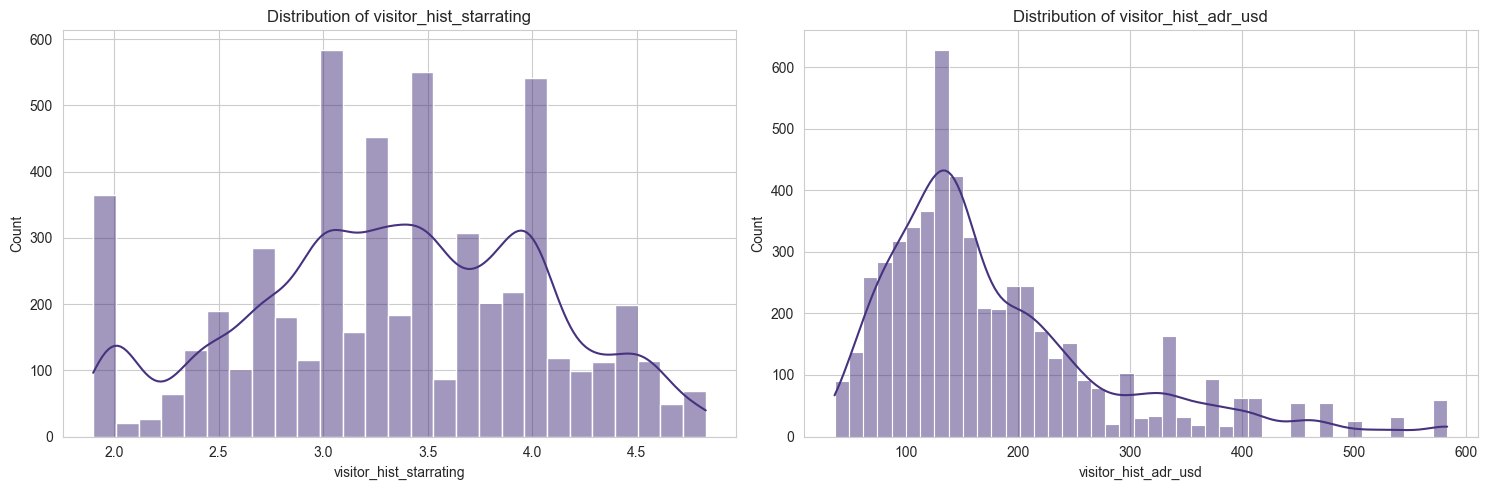

In [14]:
# Visualize user historical preferences
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(user_hist_cols):
    if df_sample[col].notnull().any():
        clip_value = df_sample[col].quantile(0.99)  # Clip extreme values
        sns.histplot(df_sample[col].dropna().clip(upper=clip_value), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    else:
        axes[i].text(0.5, 0.5, 'All values are NULL', ha='center', va='center')
        axes[i].set_title(f'{col} - No Data')

plt.tight_layout()

## Property Feature Analysis

Explore the hotel property features to understand hotel characteristics.

In [15]:
# Analyze hotel countries and properties
print(f"Number of unique hotel countries: {df_sample['prop_country_id'].nunique():,}")
print(f"Number of unique hotels: {df_sample['prop_id'].nunique():,}")

# Compare visitor countries vs hotel countries
same_country = (df_sample['visitor_location_country_id'] == df_sample['prop_country_id'])
print(f"Searches for hotels in visitor's country: {same_country.mean() * 100:.2f}%")

Number of unique hotel countries: 102
Number of unique hotels: 42,572
Searches for hotels in visitor's country: 62.44%


In [16]:
# Analyze hotel ratings and scores
hotel_rating_cols = ['prop_starrating', 'prop_review_score']

for col in hotel_rating_cols:
    print(f"\n{col} stats:")
    print(df_sample[col].describe())
    print(f"Missing values: {df_sample[col].isnull().sum():,} ({df_sample[col].isnull().sum() / len(df_sample) * 100:.2f}%)")


prop_starrating stats:
count   100000.00
mean         3.19
std          1.05
min          0.00
25%          3.00
50%          3.00
75%          4.00
max          5.00
Name: prop_starrating, dtype: float64
Missing values: 0 (0.00%)

prop_review_score stats:
count   99845.00
mean        3.78
std         1.03
min         0.00
25%         3.50
50%         4.00
75%         4.50
max         5.00
Name: prop_review_score, dtype: float64
Missing values: 155 (0.15%)


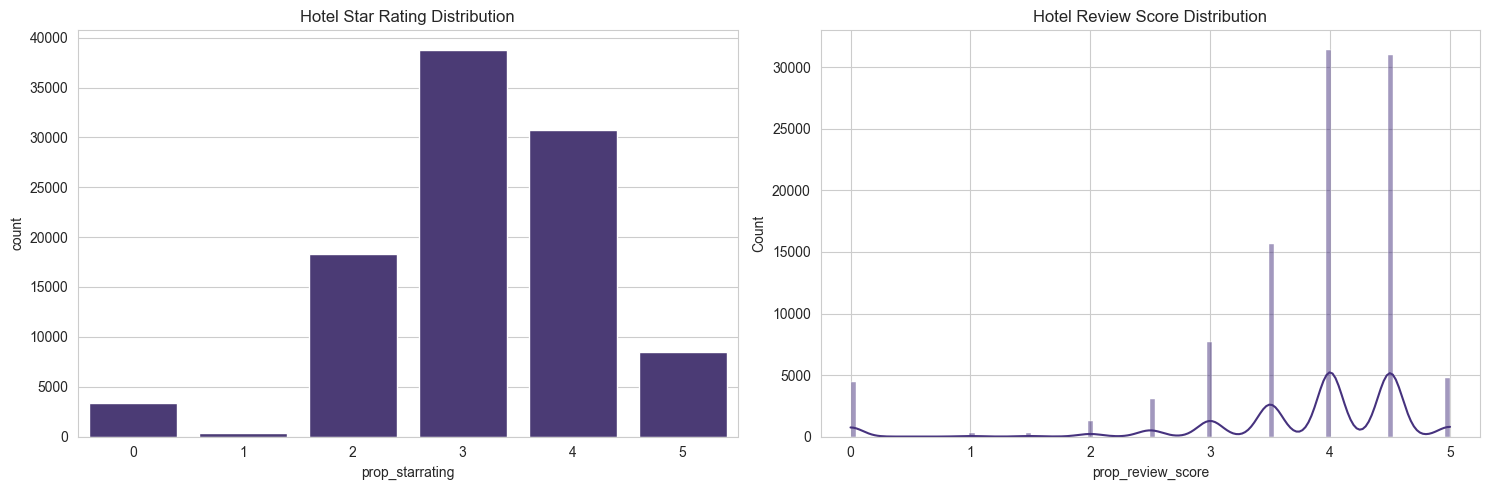

In [17]:
# Visualize hotel ratings and scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='prop_starrating', data=df_sample, ax=axes[0])
axes[0].set_title('Hotel Star Rating Distribution')

sns.histplot(df_sample['prop_review_score'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Hotel Review Score Distribution')

plt.tight_layout()

In [18]:
# Analyze hotel brand and location scores
print(f"Brand hotels: {df_sample['prop_brand_bool'].mean() * 100:.2f}%")

location_cols = ['prop_location_score1', 'prop_location_score2', 'orig_destination_distance']

for col in location_cols:
    print(f"\n{col} stats:")
    print(f"Missing values: {df_sample[col].isnull().sum():,} ({df_sample[col].isnull().sum() / len(df_sample) * 100:.2f}%)")
    if df_sample[col].notnull().any():
        print(df_sample[col].describe())

Brand hotels: 63.52%

prop_location_score1 stats:
Missing values: 0 (0.00%)
count   100000.00
mean         2.87
std          1.53
min          0.00
25%          1.79
50%          2.77
75%          4.04
max          6.97
Name: prop_location_score1, dtype: float64

prop_location_score2 stats:
Missing values: 21,942 (21.94%)
count   78058.00
mean        0.13
std         0.16
min         0.00
25%         0.02
50%         0.07
75%         0.18
max         0.99
Name: prop_location_score2, dtype: float64

orig_destination_distance stats:
Missing values: 32,429 (32.43%)
count   67571.00
mean     1290.58
std      1968.21
min         0.01
25%       149.94
50%       397.65
75%      1491.99
max     11632.10
Name: orig_destination_distance, dtype: float64


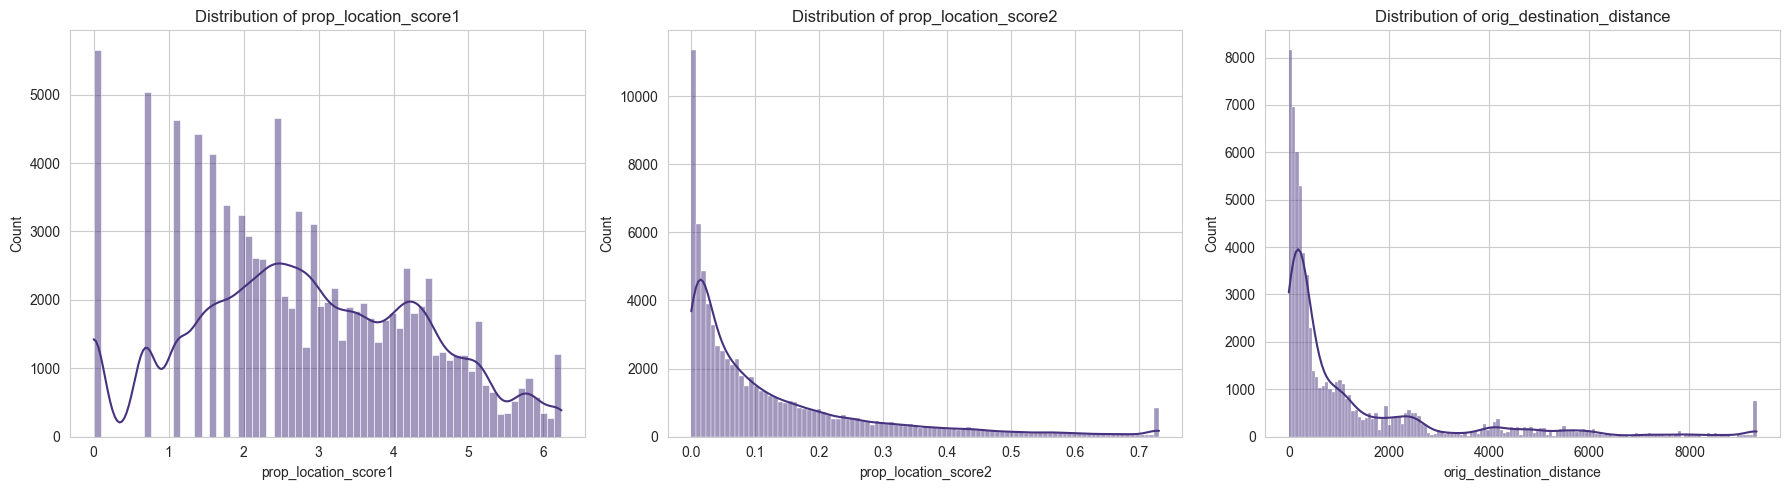

In [19]:
# Visualize location scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(location_cols):
    if df_sample[col].notnull().any():
        # Clip extreme values for better visualization
        clip_value = df_sample[col].quantile(0.99) if df_sample[col].quantile(0.99) > 0 else df_sample[col].max()
        sns.histplot(df_sample[col].dropna().clip(upper=clip_value), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    else:
        axes[i].text(0.5, 0.5, 'All values are NULL', ha='center', va='center')
        axes[i].set_title(f'{col} - No Data')

plt.tight_layout()

## Price Feature Analysis

Explore the price-related features to understand pricing patterns.

In [20]:
# Analyze price features
for col in price_features:
    print(f"\n{col} stats:")
    print(f"Missing values: {df_sample[col].isnull().sum():,} ({df_sample[col].isnull().sum() / len(df_sample) * 100:.2f}%)")
    print(df_sample[col].describe())


prop_log_historical_price stats:
Missing values: 0 (0.00%)
count   100000.00
mean         4.33
std          1.83
min          0.00
25%          4.45
50%          4.92
75%          5.32
max          6.21
Name: prop_log_historical_price, dtype: float64

price_usd stats:
Missing values: 0 (0.00%)
count   100000.00
mean       297.01
std       7134.99
min          5.08
25%         85.71
50%        123.00
75%        184.00
max     694281.00
Name: price_usd, dtype: float64

promotion_flag stats:
Missing values: 0 (0.00%)
count   100000.00
mean         0.22
std          0.42
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: promotion_flag, dtype: float64


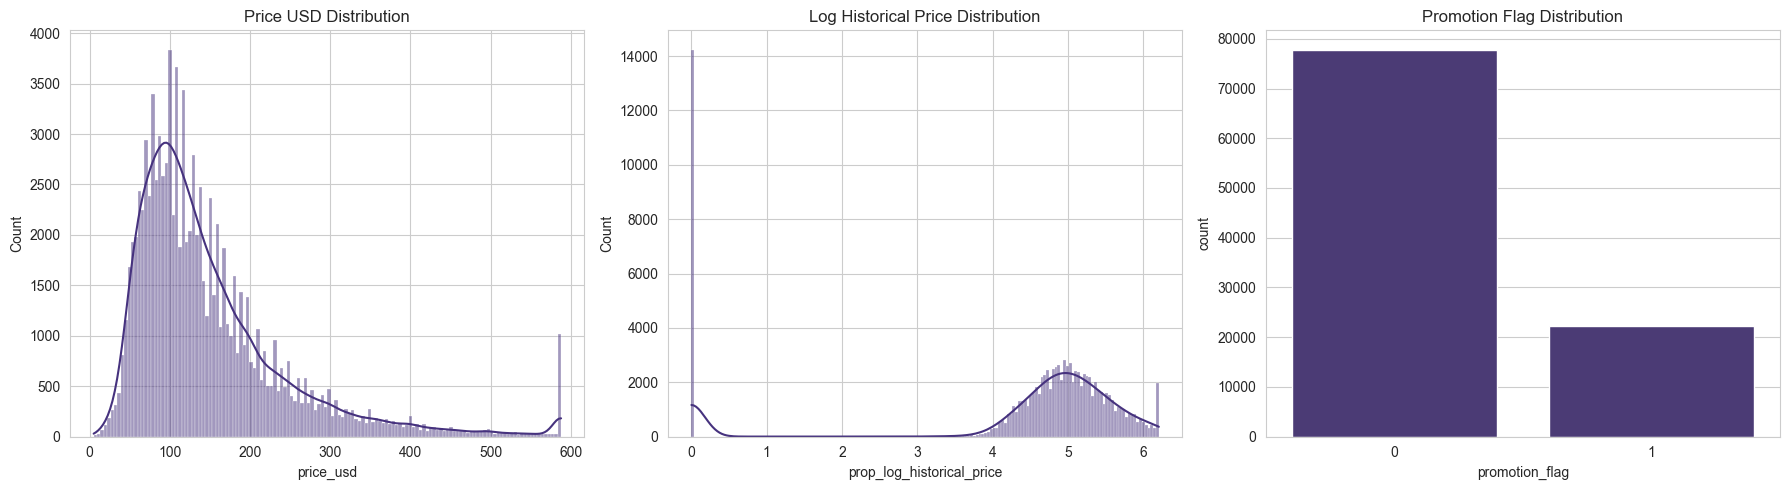

In [21]:
# Visualize price distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Price USD (clipped for better visualization)
clip_value = df_sample['price_usd'].quantile(0.99)
sns.histplot(df_sample['price_usd'].clip(upper=clip_value), kde=True, ax=axes[0])
axes[0].set_title('Price USD Distribution')

# Historical price (log)
sns.histplot(df_sample['prop_log_historical_price'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Log Historical Price Distribution')

# Promotion flag
sns.countplot(x='promotion_flag', data=df_sample, ax=axes[2])
axes[2].set_title('Promotion Flag Distribution')

plt.tight_layout()

## Relationship Analysis

Explore relationships between key features to identify patterns.

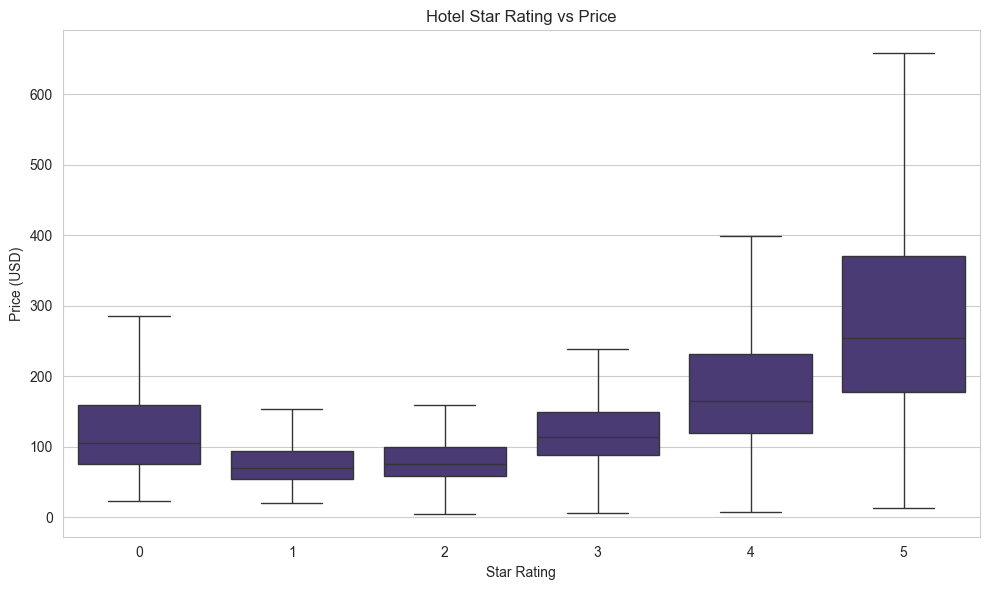

In [22]:
# Relationship between star rating and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='prop_starrating', y='price_usd', data=df_sample, showfliers=False)
plt.title('Hotel Star Rating vs Price')
plt.xlabel('Star Rating')
plt.ylabel('Price (USD)')
plt.tight_layout()

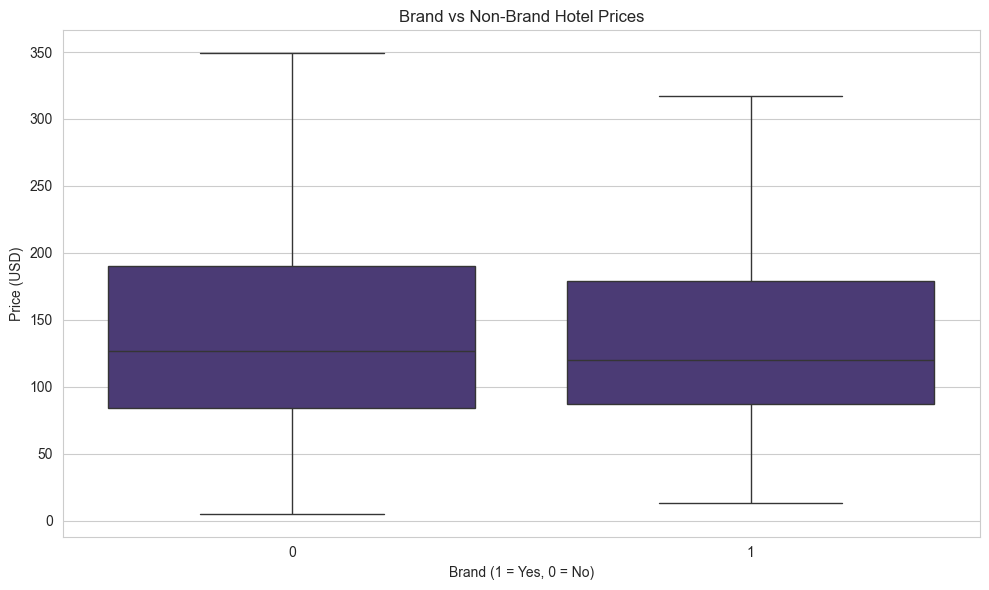

In [23]:
# Brand vs non-brand hotel prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='prop_brand_bool', y='price_usd', data=df_sample, showfliers=False)
plt.title('Brand vs Non-Brand Hotel Prices')
plt.xlabel('Brand (1 = Yes, 0 = No)')
plt.ylabel('Price (USD)')
plt.tight_layout()

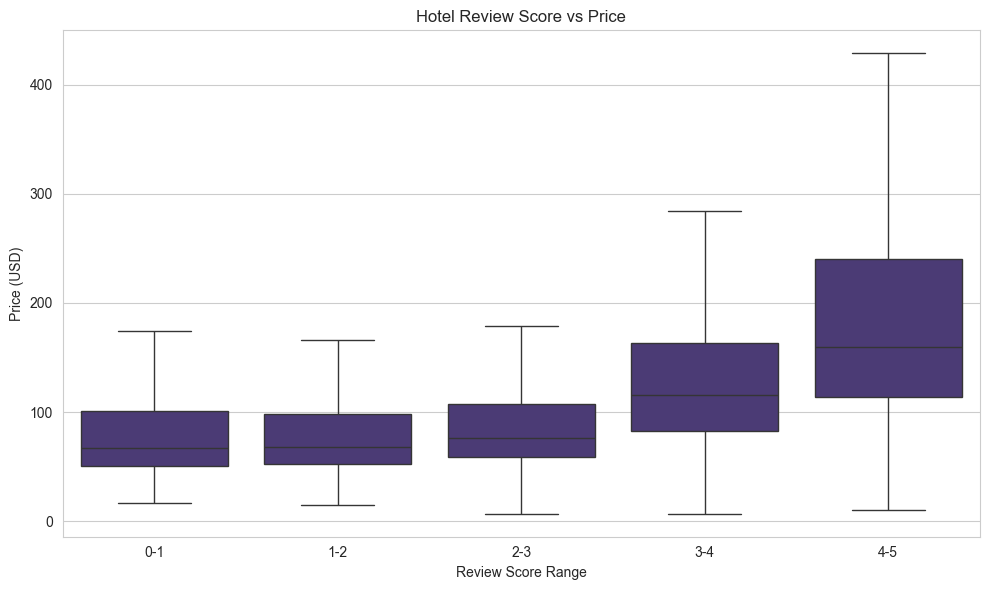

In [24]:
# Relationship between review score and price
# Group review scores into bins for clearer visualization
df_sample['review_score_bin'] = pd.cut(df_sample['prop_review_score'], 
                                     bins=[0, 1, 2, 3, 4, 5],
                                     labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score_bin', y='price_usd', data=df_sample, showfliers=False)
plt.title('Hotel Review Score vs Price')
plt.xlabel('Review Score Range')
plt.ylabel('Price (USD)')
plt.tight_layout()

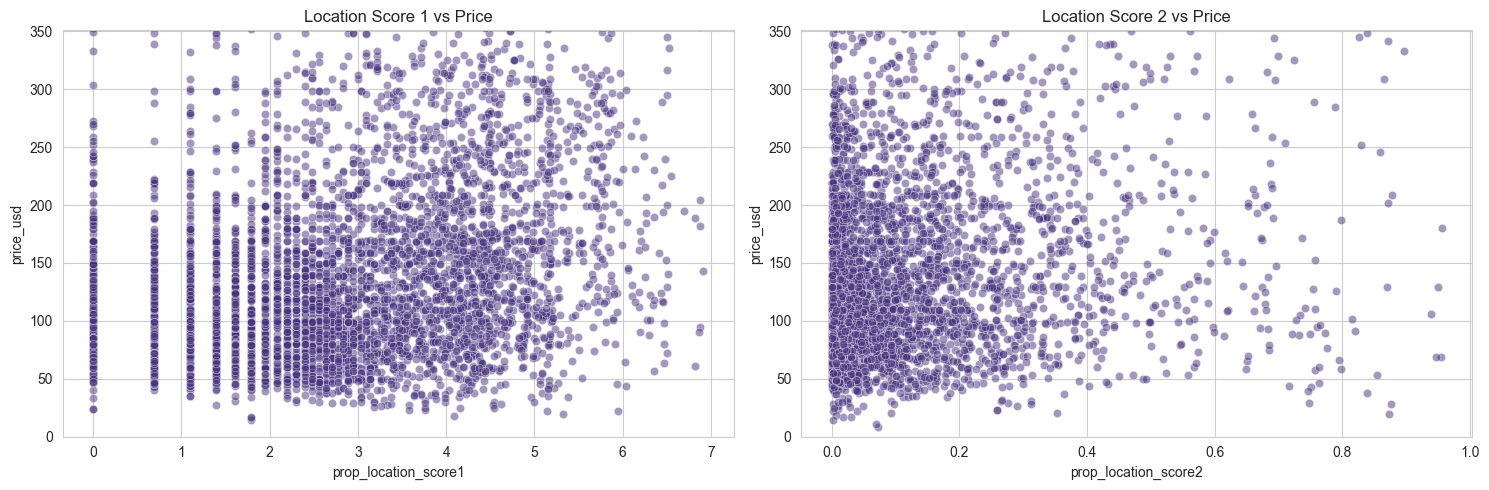

In [25]:
# Relationship between location score and price
# Use a sample for scatterplot to avoid overcrowding
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='prop_location_score1', y='price_usd', 
               data=df_sample.sample(5000), alpha=0.5)
plt.ylim(0, df_sample['price_usd'].quantile(0.95))  # Limit y-axis for better visualization
plt.title('Location Score 1 vs Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='prop_location_score2', y='price_usd', 
               data=df_sample.sample(5000), alpha=0.5)
plt.ylim(0, df_sample['price_usd'].quantile(0.95))  # Limit y-axis for better visualization
plt.title('Location Score 2 vs Price')

plt.tight_layout()

## Competitor Analysis

Analyze competitor data to understand competitive landscape.

In [26]:
# Check availability of competitor data
comp_rate_cols = [col for col in df_sample.columns if col.startswith('comp') and col.endswith('rate')]
comp_inv_cols = [col for col in df_sample.columns if col.startswith('comp') and col.endswith('inv')]
comp_diff_cols = [col for col in df_sample.columns if col.startswith('comp') and col.endswith('diff')]

# Count non-null values for each competitor column
comp_data = pd.DataFrame({
    'Rate Available': [df_sample[col].notnull().mean() * 100 for col in comp_rate_cols],
    'Inventory Available': [df_sample[col].notnull().mean() * 100 for col in comp_inv_cols],
    'Price Diff Available': [df_sample[col].notnull().mean() * 100 for col in comp_diff_cols]
}, index=[f'Competitor {i+1}' for i in range(8)])

comp_data

,Rate Available,Inventory Available,Price Diff Available
Competitor 1,2.18,2.35,1.68
Competitor 2,41.64,43.73,11.51
Competitor 3,30.72,33.22,9.55
Competitor 4,6.60,7.26,2.70
Competitor 5,45.72,48.50,17.34
Competitor 6,4.80,5.19,1.99
Competitor 7,6.72,7.57,3.00
Competitor 8,38.22,39.66,12.18


<Figure size 1200x600 with 0 Axes>

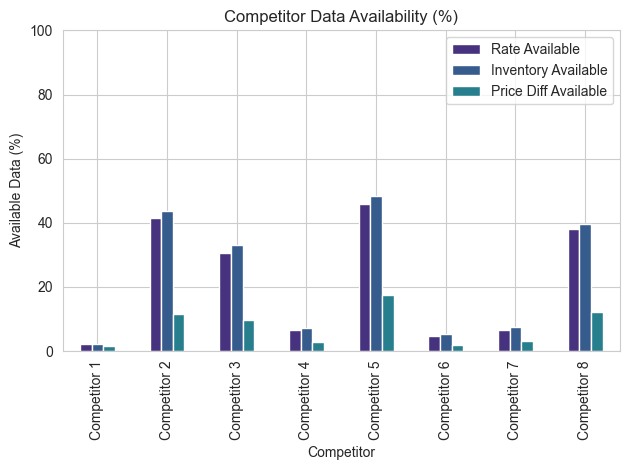

In [27]:
# Visualize competitor data availability
plt.figure(figsize=(12, 6))
comp_data.plot(kind='bar')
plt.title('Competitor Data Availability (%)')
plt.xlabel('Competitor')
plt.ylabel('Available Data (%)')
plt.ylim(0, 100)
plt.tight_layout()


comp1_rate_percent_diff stats:
count   1679.00
mean     391.85
std     1419.28
min        2.00
25%        7.00
50%       10.00
75%       16.00
max     9205.00
Name: comp1_rate_percent_diff, dtype: float64


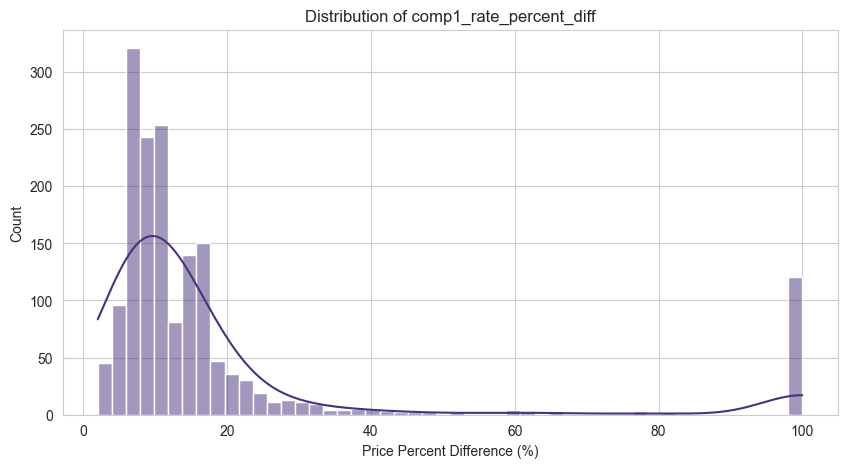


comp2_rate_percent_diff stats:
count   11508.00
mean       18.18
std        70.77
min         2.00
25%         7.00
50%        11.00
75%        20.00
max      6940.00
Name: comp2_rate_percent_diff, dtype: float64


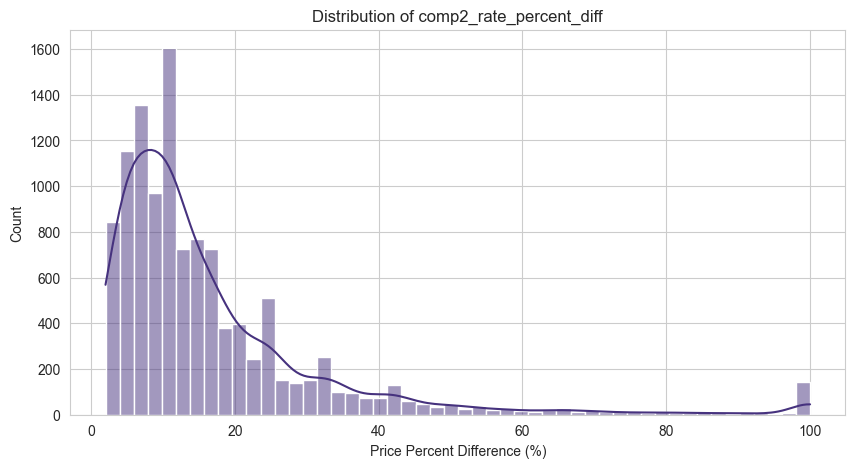


comp3_rate_percent_diff stats:
count   9553.00
mean      17.03
std       49.56
min        2.00
25%        7.00
50%       11.00
75%       18.00
max     2755.00
Name: comp3_rate_percent_diff, dtype: float64


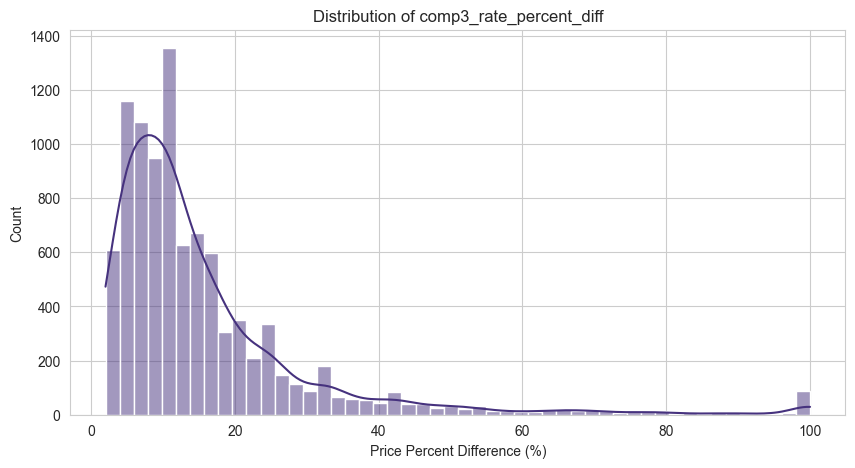


comp4_rate_percent_diff stats:
count   2704.00
mean      20.82
std      114.66
min        2.00
25%        7.00
50%       11.00
75%       19.00
max     5516.00
Name: comp4_rate_percent_diff, dtype: float64


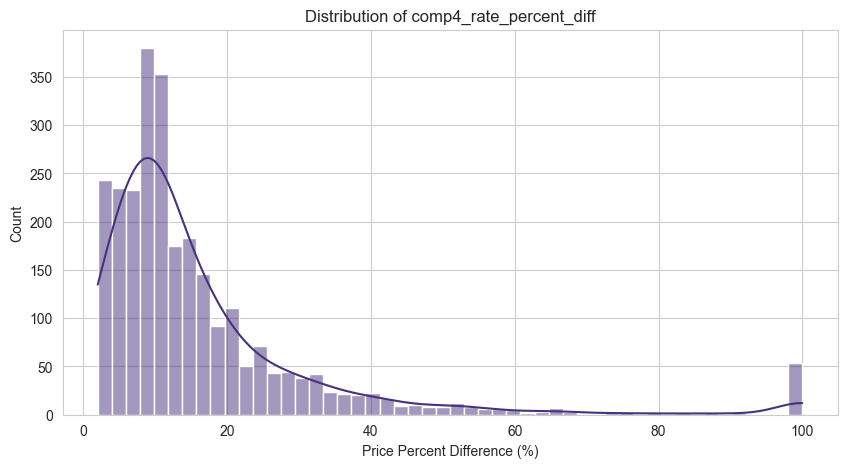


comp5_rate_percent_diff stats:
count   17338.00
mean       18.31
std        26.13
min         2.00
25%         7.00
50%        12.00
75%        21.00
max      1126.00
Name: comp5_rate_percent_diff, dtype: float64


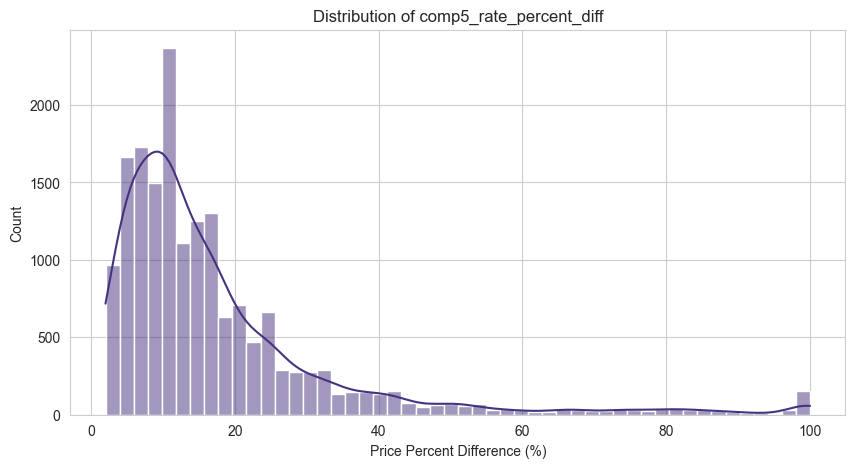


comp6_rate_percent_diff stats:
count   1989.00
mean      15.95
std       24.64
min        2.00
25%        5.00
50%       11.00
75%       18.00
max      605.00
Name: comp6_rate_percent_diff, dtype: float64


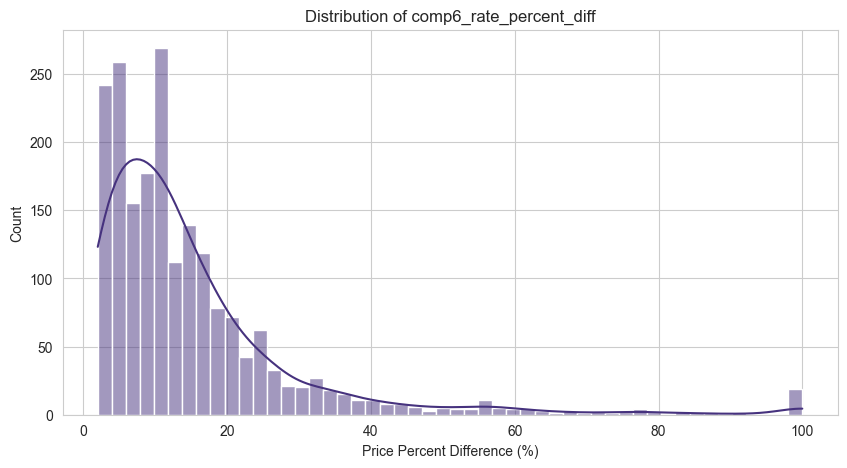


comp7_rate_percent_diff stats:
count   2997.00
mean      20.51
std       52.38
min        2.00
25%        7.00
50%       12.00
75%       20.00
max     1159.00
Name: comp7_rate_percent_diff, dtype: float64


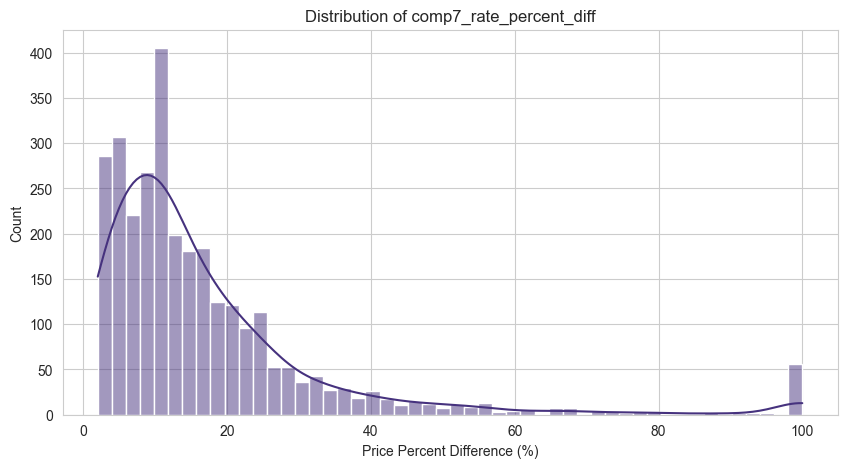


comp8_rate_percent_diff stats:
count   12182.00
mean       14.64
std        18.16
min         2.00
25%         7.00
50%        11.00
75%        17.00
max       913.00
Name: comp8_rate_percent_diff, dtype: float64


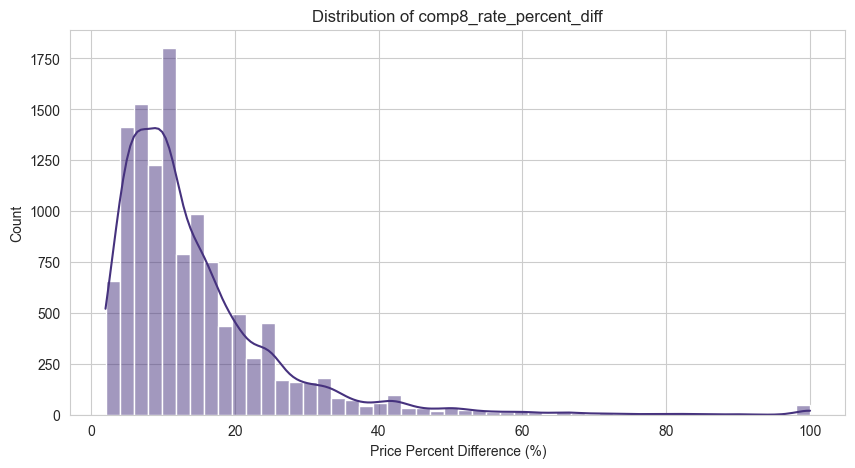

In [28]:
# Analyze price differences when available
for col in comp_diff_cols:
    if df_sample[col].notnull().any():
        print(f"\n{col} stats:")
        print(df_sample[col].describe())
        
        plt.figure(figsize=(10, 5))
        # Clip extreme values for visualization
        sns.histplot(df_sample[col].dropna().clip(lower=-100, upper=100), bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Price Percent Difference (%)')
        plt.show()

## Feature Correlation Analysis

Analyze correlations between numerical features.

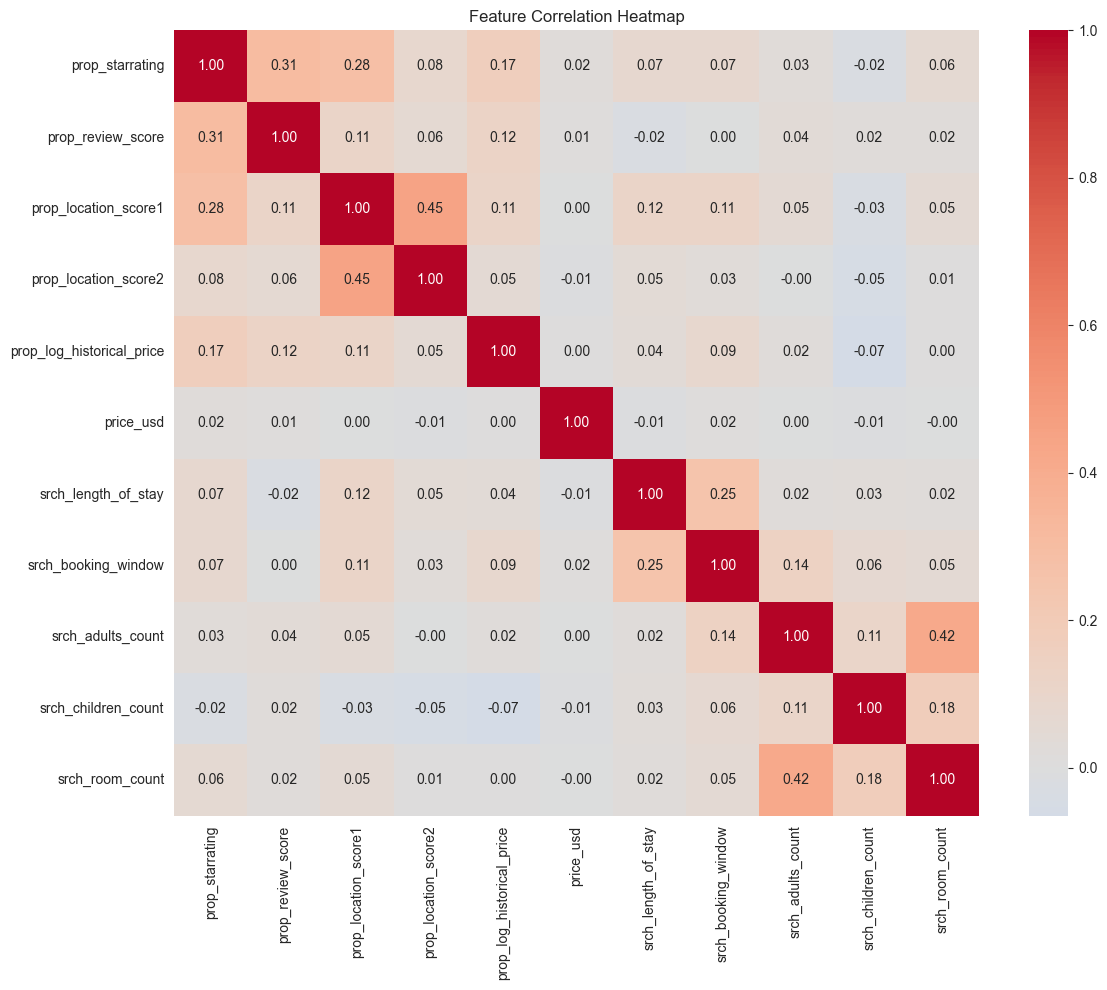

In [29]:
# Select numerical columns for correlation analysis
num_cols = ['prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2',
           'prop_log_historical_price', 'price_usd', 'srch_length_of_stay', 'srch_booking_window',
           'srch_adults_count', 'srch_children_count', 'srch_room_count']

# Compute correlation matrix
corr_matrix = df_sample[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()

## Search Results Analysis

Analyze how many results are returned for each search and their properties.

In [30]:
# Group by search ID
search_stats = df_sample.groupby('srch_id').agg({
    'prop_id': ['count', 'nunique'],  # Number of results and unique hotels
    'price_usd': ['min', 'max', 'mean', 'std'],  # Price statistics
    'prop_starrating': ['min', 'max', 'mean', 'std'],  # Star rating statistics
    'prop_review_score': ['min', 'max', 'mean', 'std']  # Review score statistics
})

# Rename columns for clarity
search_stats.columns = ['_'.join(col).strip() for col in search_stats.columns.values]
search_stats = search_stats.reset_index()

# Display statistics about search results
print(f"Number of searches: {len(search_stats):,}")
print("\nSummary of search results:")
search_stats.describe().T

Number of searches: 4,012

Summary of search results:


,count,mean,std,min,25%,50%,75%,max
srch_id,4012.00,3285.51,1898.08,1.00,1656.75,3264.00,4927.75,6611.00
prop_id_count,4012.00,24.93,9.13,5.00,18.00,30.00,32.00,36.00
prop_id_nunique,4012.00,24.93,9.13,5.00,18.00,30.00,32.00,36.00
price_usd_min,4012.00,119.23,1941.38,5.08,48.00,63.15,89.00,105753.00
price_usd_max,4012.00,595.95,11465.97,34.16,181.00,269.63,419.00,694281.00
price_usd_mean,4012.00,290.52,6442.21,20.53,100.63,134.64,188.65,387555.30
price_usd_std,4012.00,118.53,2393.56,4.16,31.98,50.81,82.34,147555.24
prop_starrating_min,4012.00,1.72,1.31,0.00,0.00,2.00,3.00,5.00
prop_starrating_max,4012.00,4.30,0.70,1.00,4.00,4.00,5.00,5.00
prop_starrating_mean,4012.00,3.16,0.74,0.03,2.65,3.13,3.67,5.00


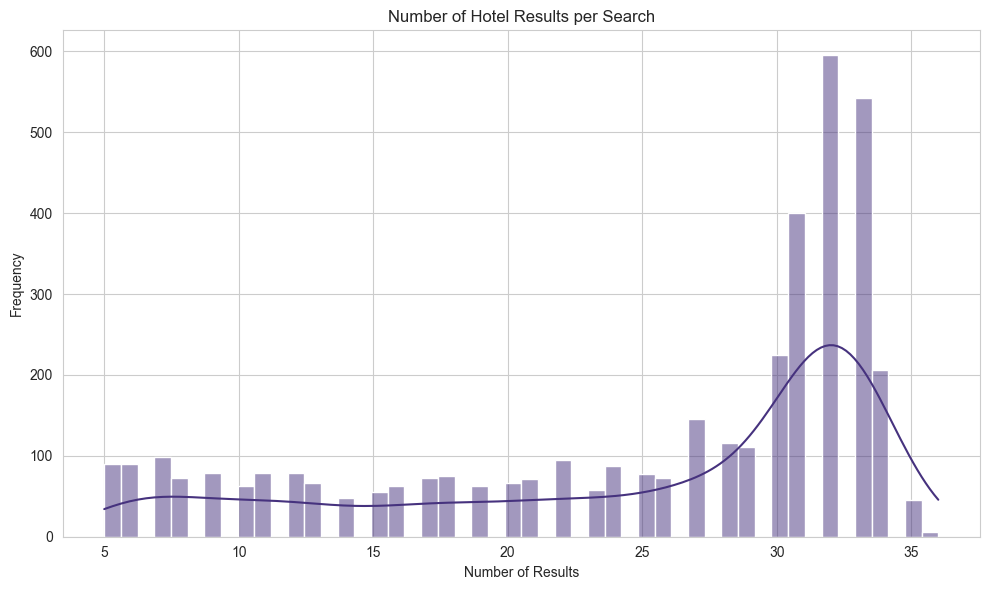

In [31]:
# Visualize number of results per search
plt.figure(figsize=(10, 6))
sns.histplot(search_stats['prop_id_count'], bins=50, kde=True)
plt.title('Number of Hotel Results per Search')
plt.xlabel('Number of Results')
plt.ylabel('Frequency')
plt.tight_layout()

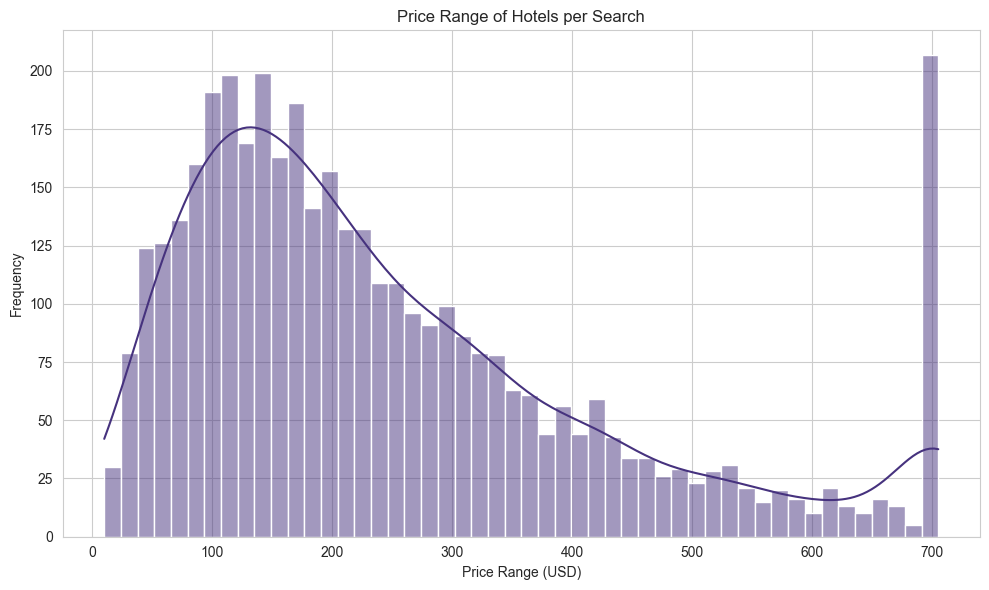

In [32]:
# Visualize price range per search
search_stats['price_range'] = search_stats['price_usd_max'] - search_stats['price_usd_min']

plt.figure(figsize=(10, 6))
sns.histplot(search_stats['price_range'].clip(upper=search_stats['price_range'].quantile(0.95)), 
            bins=50, kde=True)
plt.title('Price Range of Hotels per Search')
plt.xlabel('Price Range (USD)')
plt.ylabel('Frequency')
plt.tight_layout()

## Feature Engineering Ideas

Based on the exploratory analysis, here are some potential feature engineering ideas for improving hotel recommendations.

### Time-based Features
- Day of week for search (weekday vs weekend)
- Month of year (seasonality)
- Is the search for a holiday period
- Days until check-in (booking window)
- Total trip duration (length of stay)

### User-based Features
- Is the user searching for hotels in their own country
- Difference between historical preferences and current options (star rating, price)
- User loyalty (if available - frequency of searches or bookings)

### Property-based Features
- Price point relative to search average (is this hotel cheaper or more expensive than average for this search?)
- Star rating relative to search average
- Normalized location scores
- Combination of star rating and review score (potentially weighted)

### Competitive Features
- Count of competitors with available rates
- Average price difference from competitors
- Is the hotel the cheapest option among competitors
- Competitive position score (combining rate availability and price difference)

### Interaction Features
- Price per star rating (value for money)
- Price per person ratio
- Location score weighted by price
- Family-friendliness score (for searches with children)

## Summary of Key Findings

Here's a summary of the key findings from our exploratory data analysis:

1. **Dataset Structure**:
   - Large dataset with multiple searches and multiple hotel results per search
   - Many features with missing values, especially competitor data
   - Mix of user preferences, hotel attributes, and price information

2. **Search Patterns**:
   - Variations in search volume by month and day of week
   - Most searches are for short stays (1-7 days)
   - Wide variation in booking windows (days before check-in)

3. **Hotel Characteristics**:
   - Clear relationship between star rating and price
   - Brand hotels typically more expensive than non-brand hotels
   - Location scores provide important information about hotel desirability

4. **Price Patterns**:
   - Wide price range across hotel options
   - Historical price log provides context for current pricing
   - Promotions are available for some properties

5. **Competition**:
   - Competitor data is sparse but valuable when available
   - Price differences from competitors vary widely
   - Some competitors have more presence than others

6. **Correlations**:
   - Strong correlation between historical price and current price
   - Positive correlation between star rating and price
   - Some correlation between search parameters (adults, children, rooms)

## Next Steps

Based on this exploratory analysis, the next steps could include:

1. **Feature Engineering**: Implement the feature ideas identified above
2. **Missing Value Handling**: Develop strategies for handling missing values, especially in competitor data
3. **Initial Modeling**: Build baseline prediction models using the most promising features
4. **Further Exploration**: Conduct more targeted EDA based on model performance
5. **Feature Selection**: Identify the most important features for final modeling